In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
df.shape

(8807, 12)

In [5]:
 df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# find the missing values 
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown Country', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23620\562081632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_23620\562081632.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [8]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [10]:
df['year_added'] = df['date_added'].dt.year

In [11]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0


In [12]:
cols = ['title', 'director', 'cast', 'country', 'rating', 'listed_in','description']

for col in cols:
 df[col] = df[col].astype(str).str.lower()

In [13]:
df[['duration_value','duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')

In [14]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_value,duration_type
0,s1,Movie,dick johnson is dead,kirsten johnson,not available,united states,2021-09-25,2020,pg-13,90 min,documentaries,"as her father nears the end of his life, filmm...",2021.0,90,min


In [15]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


C:\Users\Dell\AppData\Local\Temp\ipykernel_23620\1718083031.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [16]:
df = df[['type','title','director','cast','country','release_year','rating',
 'duration','listed_in','description','date_added','year_added']]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   release_year  8807 non-null   int64         
 6   rating        8807 non-null   object        
 7   duration      8804 non-null   object        
 8   listed_in     8807 non-null   object        
 9   description   8807 non-null   object        
 10  date_added    8709 non-null   datetime64[ns]
 11  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 825.8+ KB


C:\Users\Dell\AppData\Local\Temp\ipykernel_23620\3315165897.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


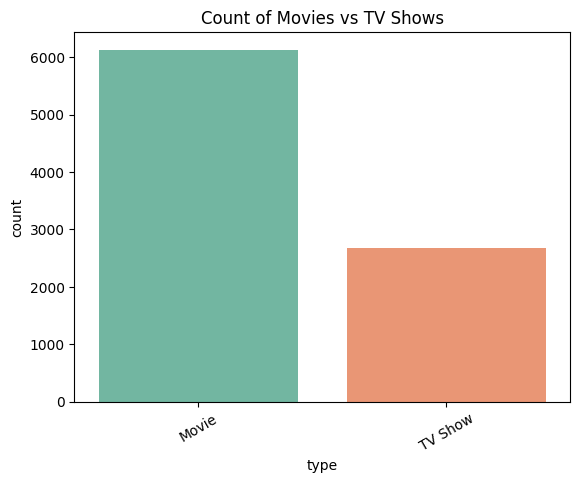

In [18]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Count of Movies vs TV Shows")
plt.xticks(rotation=30)
plt.show()


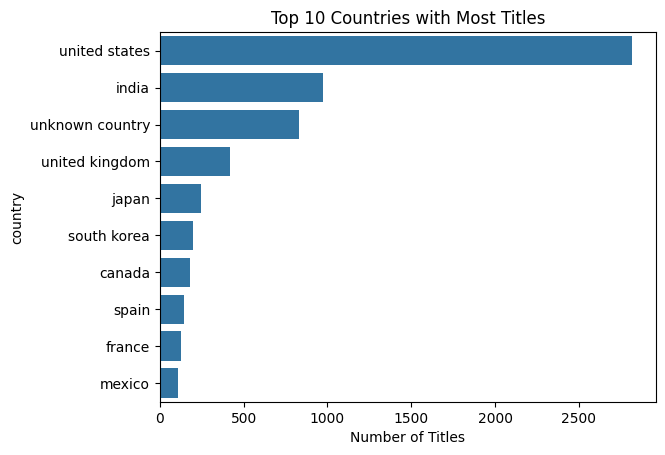

In [22]:
 top_countries = df['country'].value_counts().head(10)
 sns.barplot(y=top_countries.index, x=top_countries.values)
 plt.title("Top 10 Countries with Most Titles")
 plt.xlabel("Number of Titles")
 plt.show()

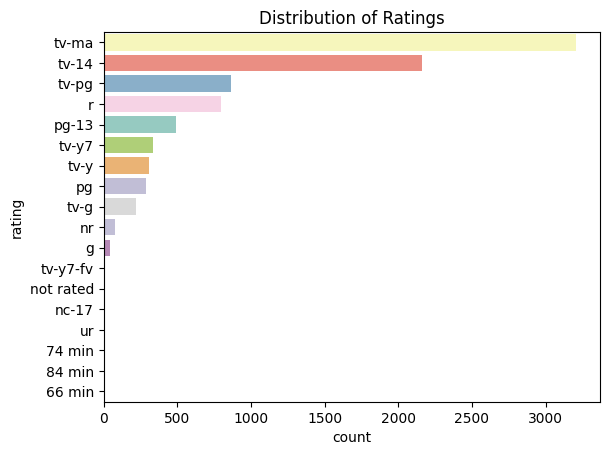

In [23]:
sns.countplot(
    y='rating',
    data=df,
    order=df['rating'].value_counts().index,
    hue='rating',       
    legend=False,       
    palette='Set3')


plt.title("Distribution of Ratings")
plt.show()



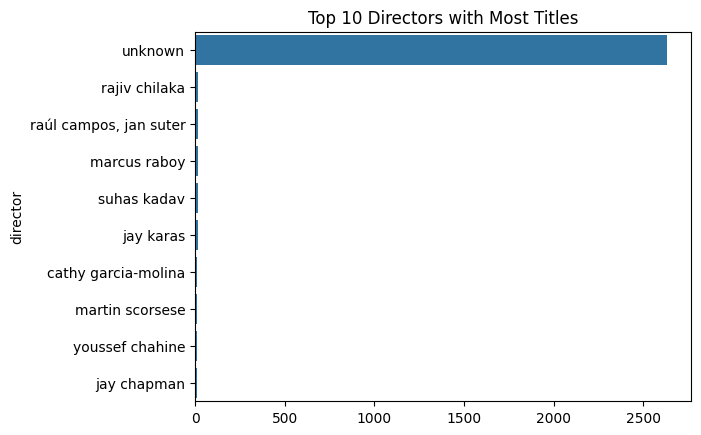

In [25]:
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors with Most Titles")
plt.show()

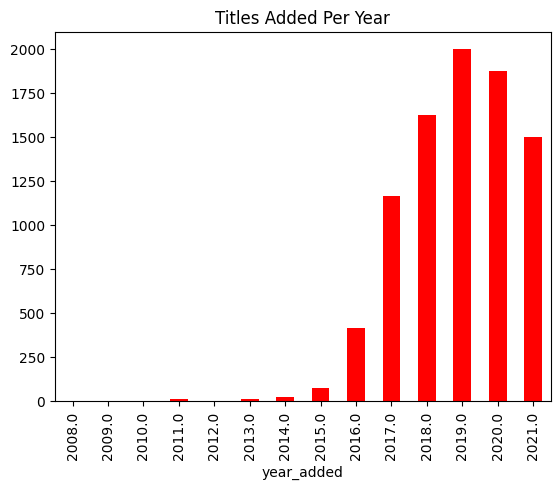

In [26]:
df['year_added'].value_counts().sort_index().plot(
    kind='bar', 
    color='red')
plt.title("Titles Added Per Year")
plt.show()


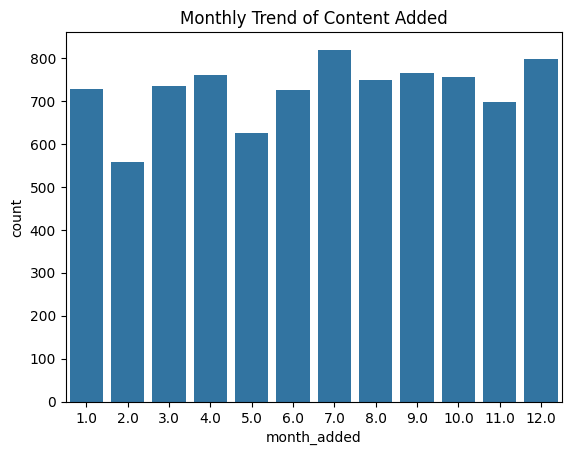

In [28]:
 df['month_added'] = df['date_added'].dt.month
 sns.countplot(x='month_added', data=df)
 plt.title("Monthly Trend of Content Added")
 plt.show()

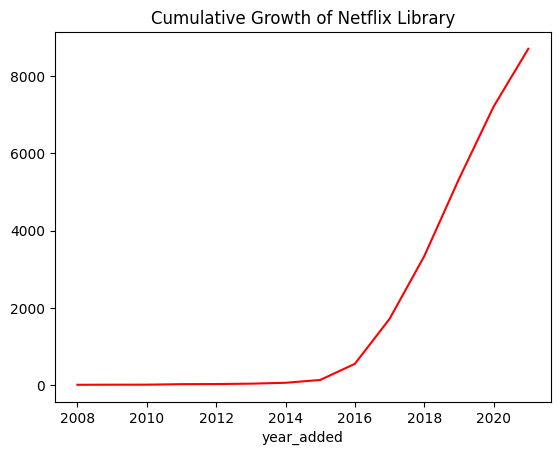

In [29]:
df['year_added'].value_counts().sort_index().cumsum().plot(
    kind='line',
    color='red')
plt.title("Cumulative Growth of Netflix Library")
plt.show()


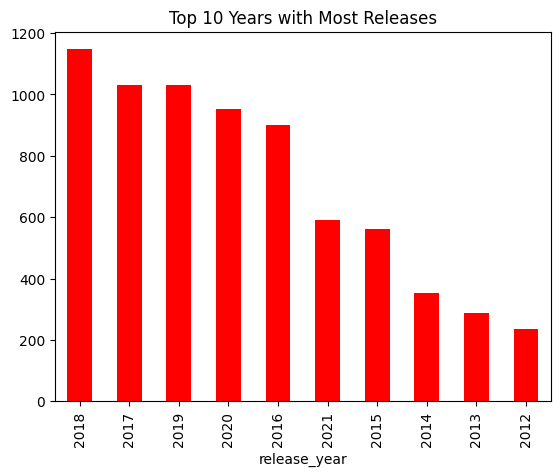

In [30]:
df['release_year'].value_counts().head(10).plot(
    kind='bar',
    color='red')
plt.title("Top 10 Years with Most Releases")
plt.show()


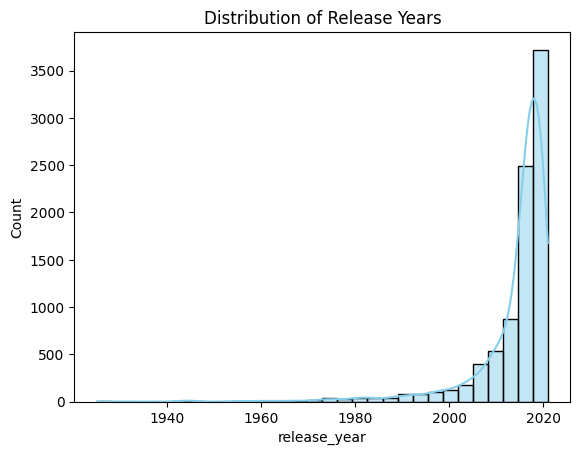

In [31]:
sns.histplot(
    df['release_year'],
    bins=30,
    kde=True,
    color='skyblue')
plt.title("Distribution of Release Years")
plt.show()


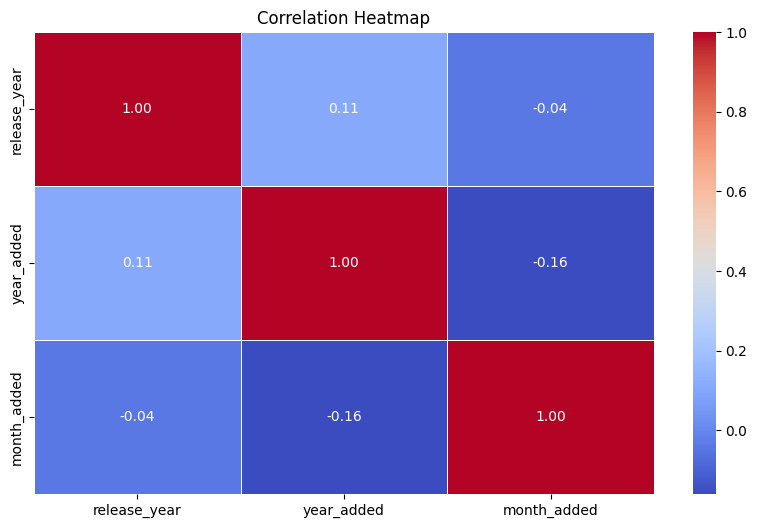

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


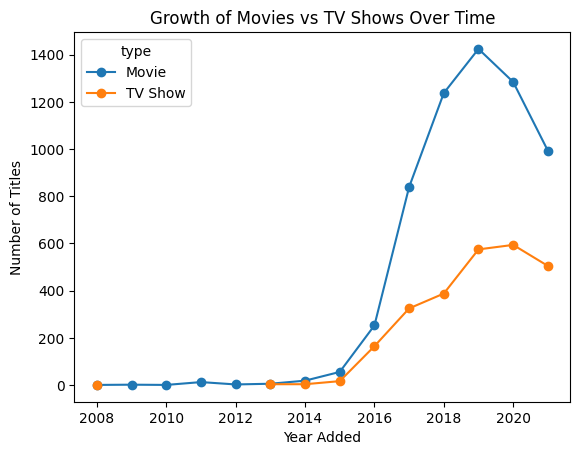

In [34]:
 content_growth = df.groupby(['year_added','type']).size().unstack()
 content_growth.plot(kind='line', marker='o')
 plt.title("Growth of Movies vs TV Shows Over Time")
 plt.xlabel("Year Added")
 plt.ylabel("Number of Titles")
 plt.show()

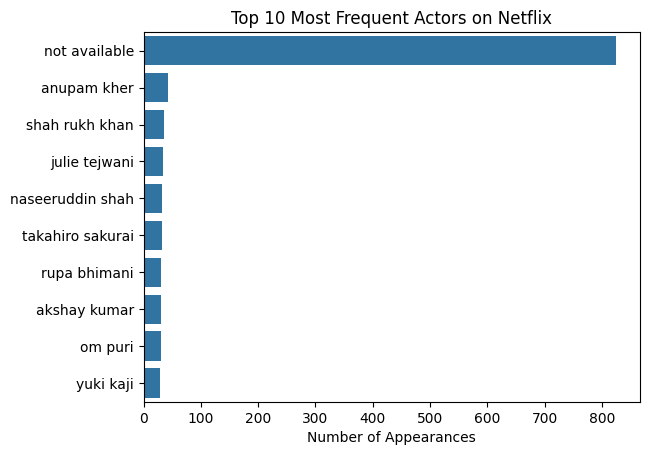

In [36]:
from collections import Counter

actor_list = df['cast'].dropna().str.split(',').tolist()
flat_list = [actor.strip() for sublist in actor_list for actor in sublist]
actor_count = Counter(flat_list).most_common(10)
actors, counts = zip(*actor_count)
sns.barplot(x=list(counts), y=list(actors))
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Number of Appearances")
plt.show()

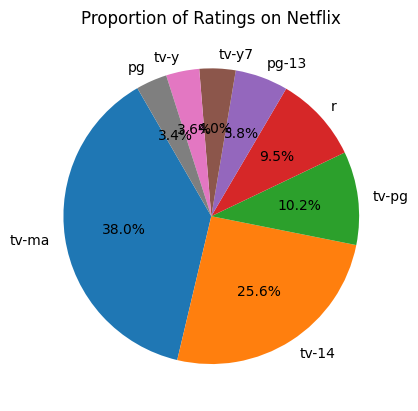

In [38]:
rating_counts = df['rating'].value_counts().head(8)
rating_counts.plot(kind='pie', autopct='%1.1f%%', startangle=120)
plt.title("Proportion of Ratings on Netflix")
plt.ylabel("")
plt.show()

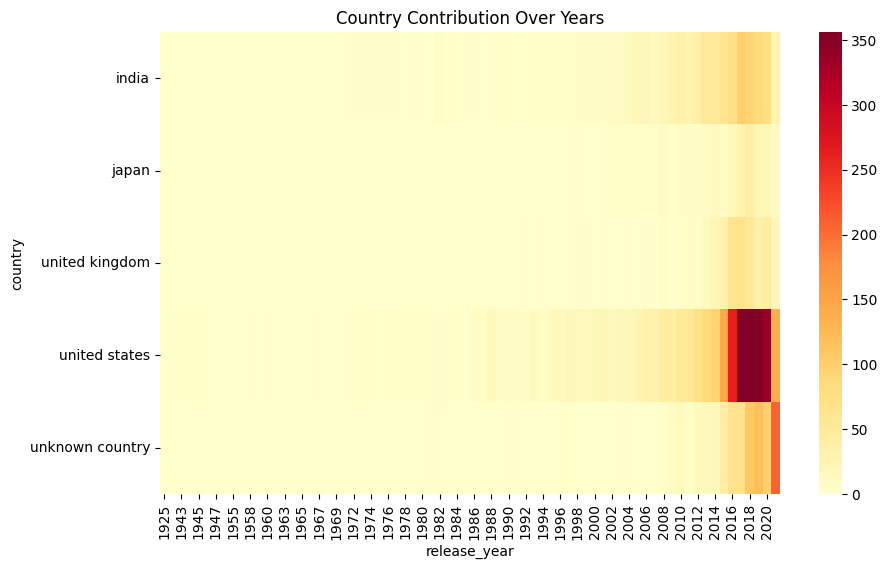

In [42]:
top_countries = df['country'].value_counts().head(5).index
country_year = df[df['country'].isin(top_countries)].pivot_table(index='country', columns='release_year', aggfunc='size',fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(country_year, cmap='YlOrRd')
plt.title("Country Contribution Over Years")
plt.show()

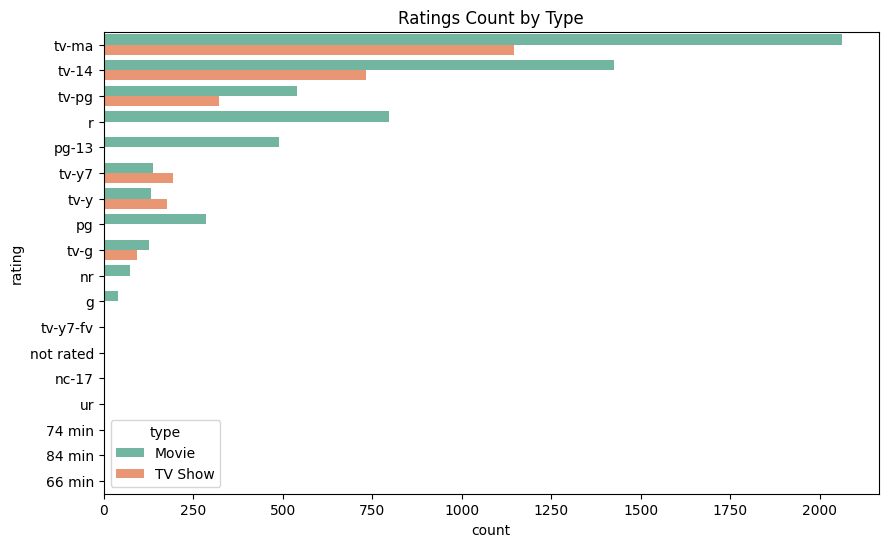

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(
    y='rating',
    hue='type',
    data=df,
    order=df['rating'].value_counts().index,
    palette='Set2'
)
plt.title("Ratings Count by Type")
plt.show()


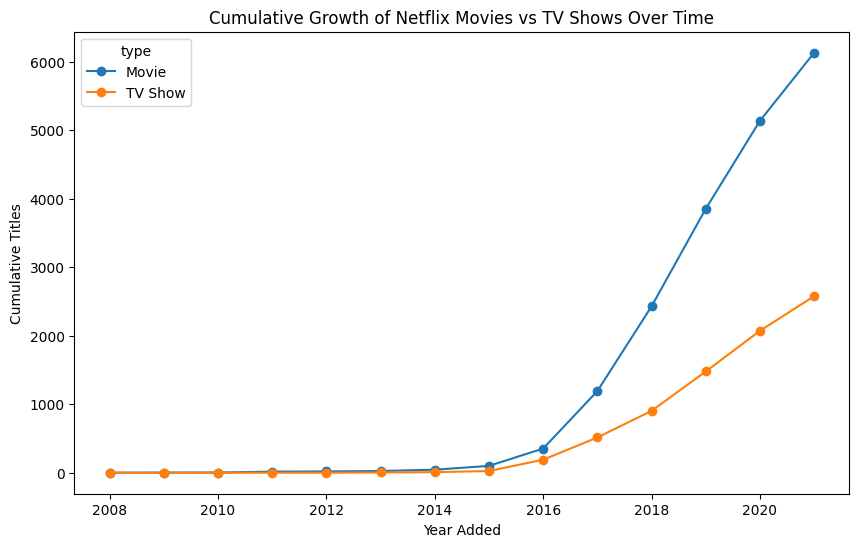

In [45]:
growth_data = df.groupby(['year_added','type']).size().unstack(fill_value=0)
cumulative = growth_data.cumsum()
cumulative.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Cumulative Growth of Netflix Movies vs TV Shows Over Time")
plt.xlabel("Year Added")
plt.ylabel("Cumulative Titles")
plt.show()

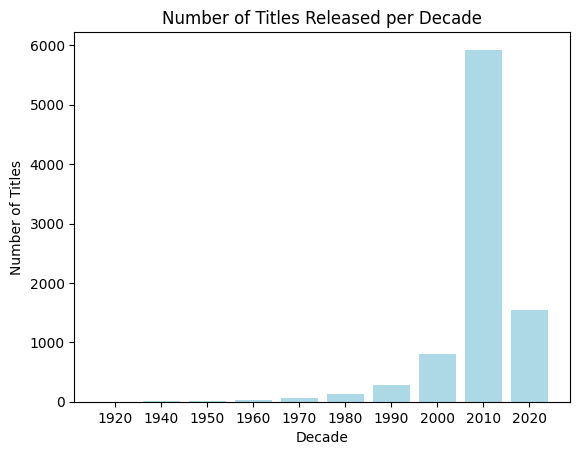

In [47]:
df['decade'] = (df['release_year'] // 10) * 10
 # Count number of titles per decade

decade_counts = df['decade'].value_counts().sort_index()

plt.bar(decade_counts.index.astype(str), decade_counts.values,color='lightblue')

plt.title("Number of Titles Released per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Titles")
plt.show()

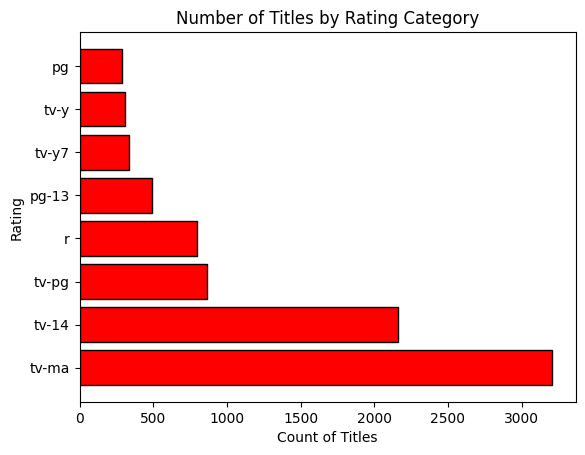

In [48]:
plt.barh(
    rating_counts.index,
    rating_counts.values,
    color="red",
    edgecolor="black")

plt.title("Number of Titles by Rating Category")
plt.xlabel("Count of Titles")
plt.ylabel("Rating")
plt.show()


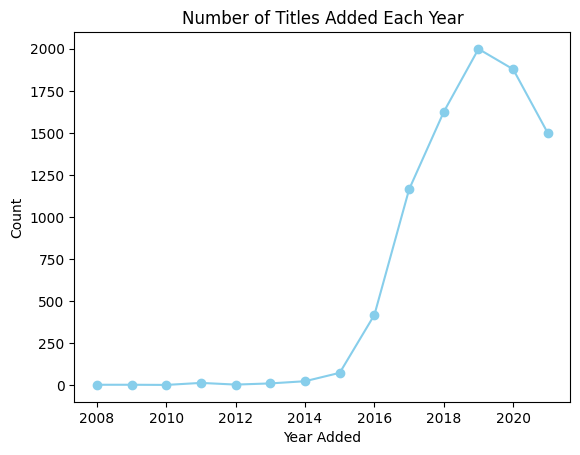

In [49]:
titles_per_year = df['year_added'].value_counts().sort_index()
titles_per_year.plot(kind='line', marker='o', color='skyblue')

plt.title("Number of Titles Added Each Year")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()


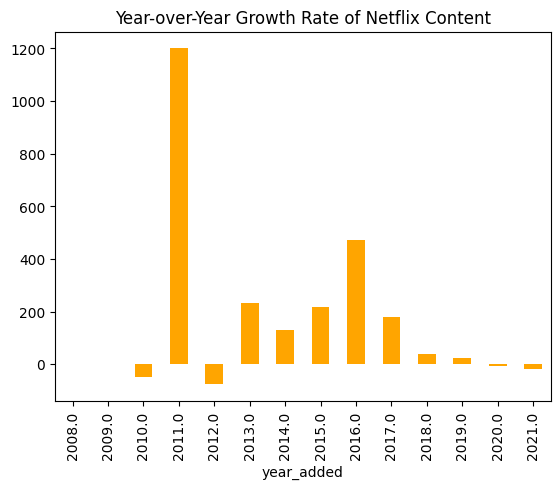

In [51]:
growth = titles_per_year.pct_change() * 100
growth.plot(kind='bar', color='orange')
plt.title("Year-over-Year Growth Rate of Netflix Content")
plt.show()

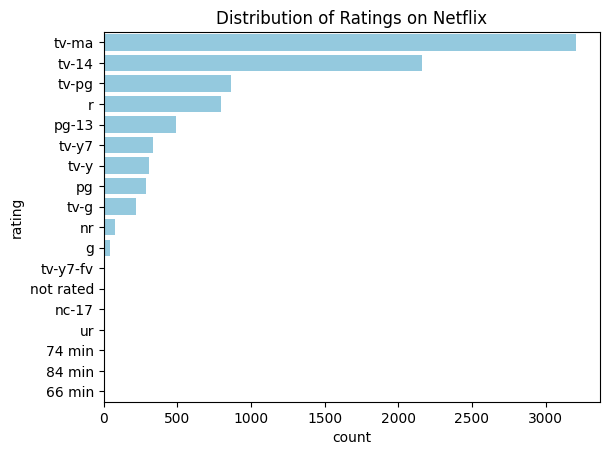

In [53]:
sns.countplot(
    y='rating',
    data=df,
    order=df['rating'].value_counts().index,
    color='skyblue')
plt.title("Distribution of Ratings on Netflix")
plt.show()


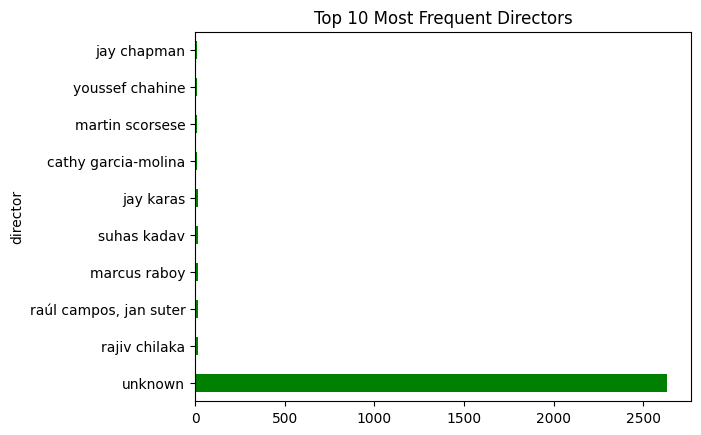

In [69]:
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='barh', color='green')

plt.title("Top 10 Most Frequent Directors")
plt.show()


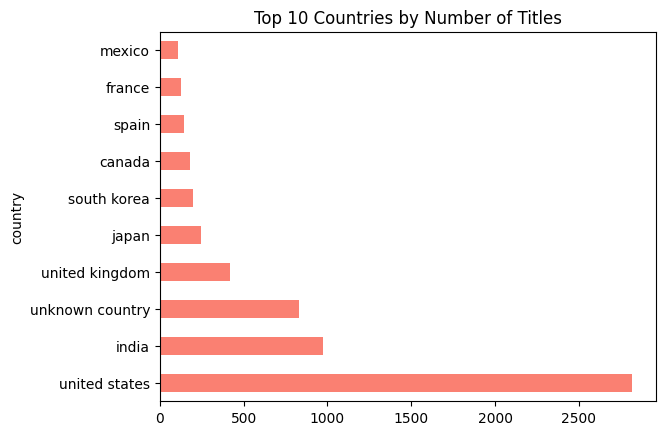

In [55]:
 top_countries = df['country'].value_counts().head(10)
 top_countries.plot(kind='barh', color='salmon')
 plt.title("Top 10 Countries by Number of Titles")
 plt.show()

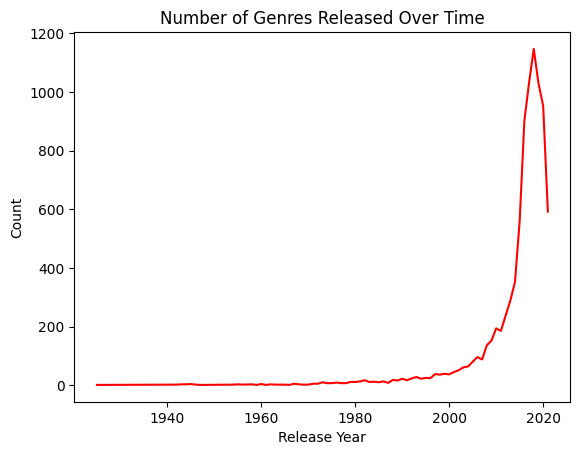

In [57]:
genre_year = df.groupby(['release_year'])['listed_in'].count()
genre_year.plot(kind='line', color='red')

plt.title("Number of Genres Released Over Time")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


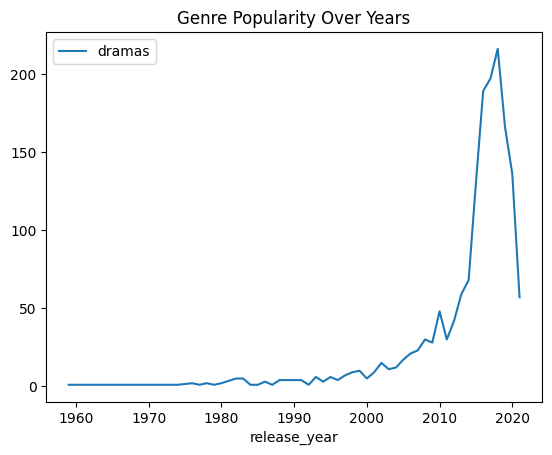

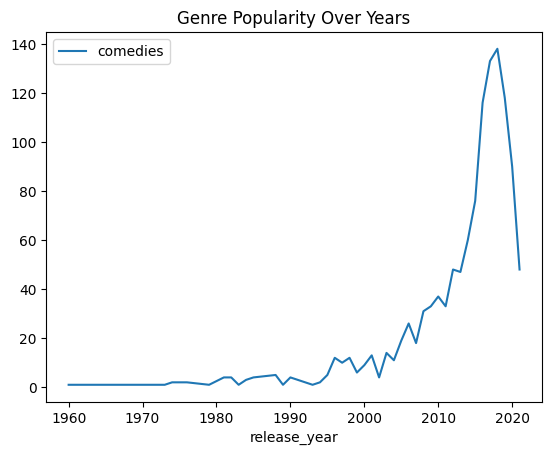

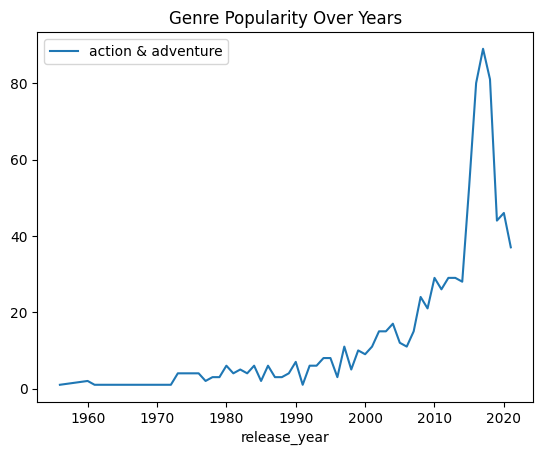

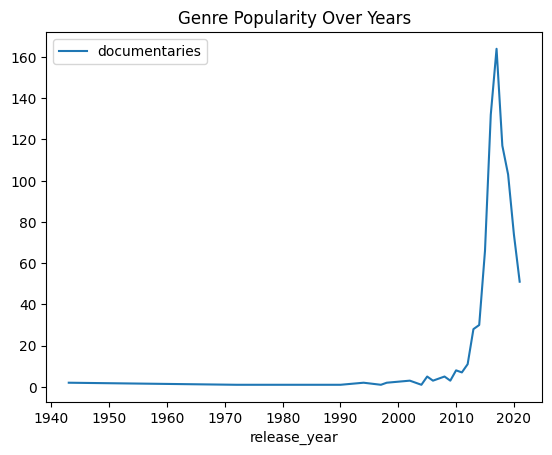

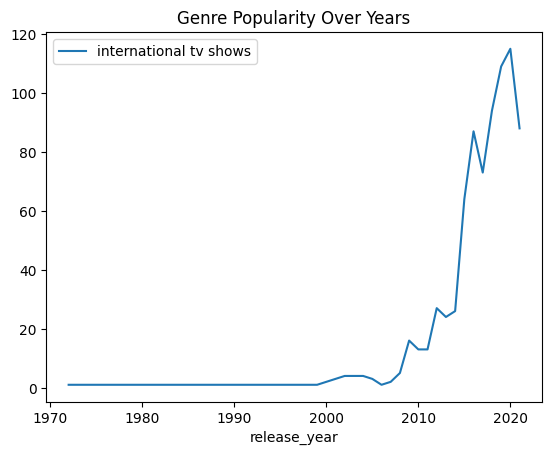

In [58]:
df_genre = df.copy()
df_genre['main_genre'] = df_genre['listed_in'].apply(lambda x: x.split(',')[0])
top_genres = df_genre['main_genre'].value_counts().head(5).index
for genre in top_genres:
 df_genre[df_genre['main_genre']==genre]['release_year'].value_counts().sort_index().plot(label=genre)
 plt.legend()
 plt.title("Genre Popularity Over Years")
 plt.show()

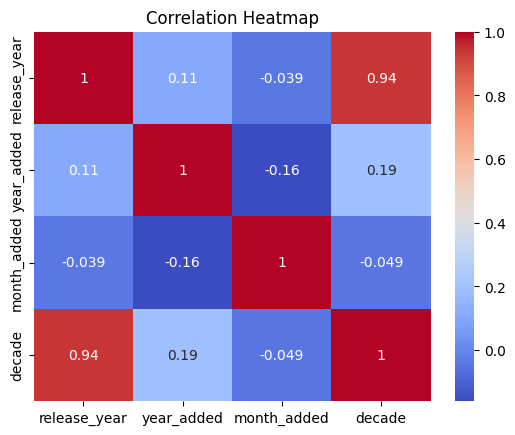

In [59]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

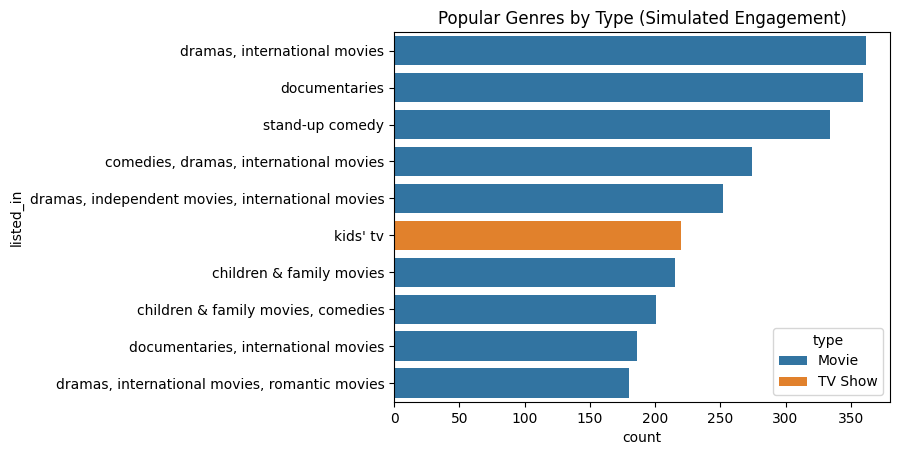

In [61]:
genre_count = df.groupby(['type','listed_in']).size().reset_index(name='count')
sns.barplot(x='count', y='listed_in', hue='type', data=genre_count.sort_values('count', ascending=False).head(10))
plt.title("Popular Genres by Type (Simulated Engagement)")
plt.show()

In [62]:
unique_genres = {
    g.strip()
    for sublist in df['listed_in'].str.split(',')
    for g in sublist
}

print("Total Unique Genres:", len(unique_genres))


Total Unique Genres: 42


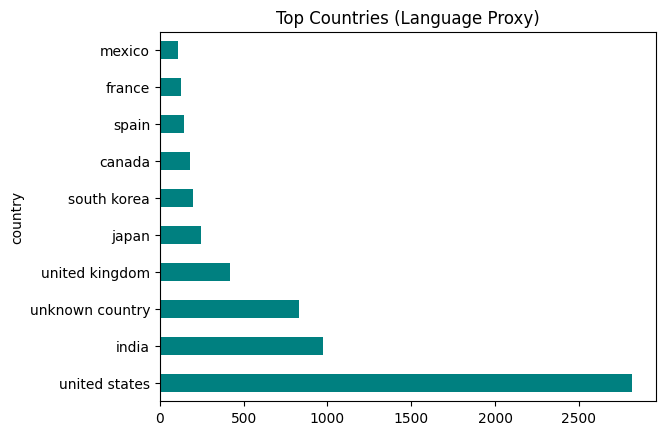

In [63]:
df['country'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Top Countries (Language Proxy)")
plt.show()

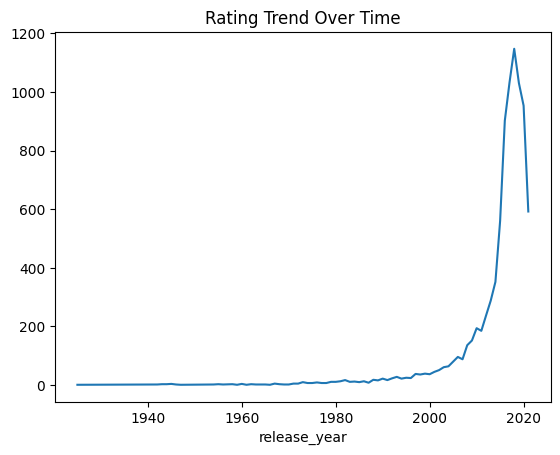

In [65]:
rating_year = df.groupby(['release_year','rating']).size().unstack().fillna(0)
rating_year.sum(axis=1).plot(kind='line')
plt.title("Rating Trend Over Time")
plt.show()

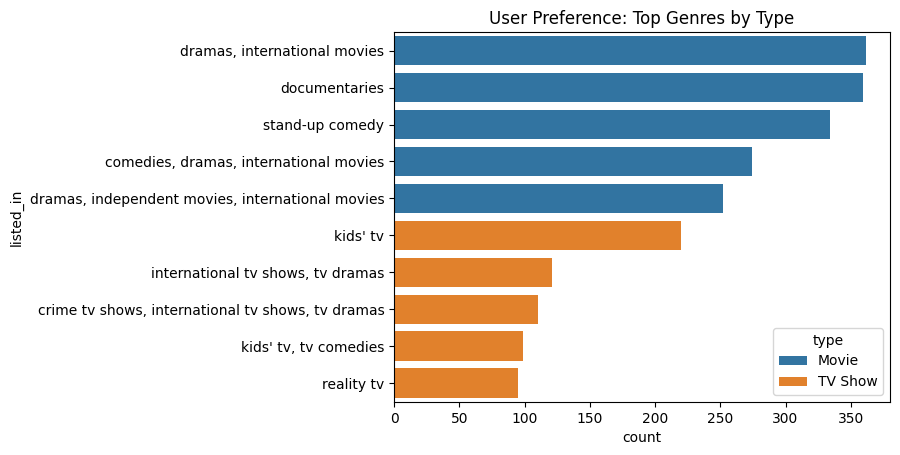

In [67]:
pref_genres = df.groupby(['type','listed_in']).size().reset_index(name='count')
top_pref = pref_genres.sort_values('count', ascending=False).groupby('type').head(5)
sns.barplot(x='count', y='listed_in', hue='type', data=top_pref)
plt.title("User Preference: Top Genres by Type")
plt.show()

In [68]:
 display(" Netflix has more movies than TV shows.")
 display(" USA and India lead in content production.")
 display(" Dramas and Comedies dominate globally.")
 display(" Rapid expansion from 2015 onwards.")
 display(" Most content is rated TV-MA or TV-14.")
 display(" Content duration remains steady (90–120 mins).")
 display(" Strong growth in regional & diverse content after 2018.")

' Netflix has more movies than TV shows.'

' USA and India lead in content production.'

' Dramas and Comedies dominate globally.'

' Rapid expansion from 2015 onwards.'

' Most content is rated TV-MA or TV-14.'

' Content duration remains steady (90–120 mins).'

' Strong growth in regional & diverse content after 2018.'